Evaluating a model using Scoring Parameter

In [2]:
import pandas as pd
heart_disease = pd.read_csv(r"C:\Users\ftska\Documents\sample_project_2\data\heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Setup random seed
import numpy as np
np.random.seed(42)

# Make the data
X= heart_disease.drop("target", axis=1)
Y=heart_disease["target"]

# Split the data
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2)

# Instantiate RandomForestClassifier
clf=RandomForestClassifier()

# Fit the model to the data (training the ml model) 
clf.fit(X_train, Y_train)


RandomForestClassifier()

In [4]:
cross_val_score(clf, X, Y, cv=3)

array([0.82178218, 0.84158416, 0.78217822])

In Normal Train and Test Split (model is trained on training data, and evaluated on the test data)
In k-fold cross validation (model is trained on k different versions of training data, and evaluated on k different versions of the test data)


In [5]:
cross_val_score(clf, X, Y, cv=5)

array([0.81967213, 0.8852459 , 0.7704918 , 0.8       , 0.75      ])

In [6]:
clf_cross_val_score=np.mean(cross_val_score(clf, X, Y, cv=3))
clf_cross_val_score

0.8184818481848185

In [7]:
clf_cross_val_score_2=np.mean(cross_val_score(clf, X, Y, cv=5))
clf_cross_val_score_2

0.834808743169399

In [8]:
# Even though cross_val_score's accuracy is lower than the non still we prefer to evalaute using this

In [9]:
# Scoring parameter set to none(by default)
# Default scoring parameter of classifier= mean accuracy

Classification model evaluation matrics
1. Accuracy
2. Area inder ROC curve
3. Confusion matrix
4. Classification Report

In [10]:
heart_disease.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target", axis=1)
Y=heart_disease["target"]
clf= RandomForestClassifier()
cross_val_score=cross_val_score(clf, X, Y, cv=5)


In [12]:
np.mean(clf_cross_val_score)

0.8184818481848185

In [13]:
print(f"heart_disease classifier cross-validated accuracy:{np.mean(cross_val_score)*100:.2f}%")

heart_disease classifier cross-validated accuracy:82.48%


In [14]:
# how likely the model will predict the label (here it is 82.48% )

Area under the receiver operating characteristc curve(AUC/ROC)
* Area Under Curve(AUC)
* ROC curve

ROC curves are the comparision of model's tpr(true positive rate) versus model's fpr(false positive rate)
* True positive= model predicts 1 when truth is 1
* False positive= model predicts 1 when truth is 0
* True negative= model predicts 0 when truth is 0
* False negative= model predicts 0 when truth is 1  

In [18]:
from sklearn.metrics import roc_curve
clf.fit(X_train, Y_train)
Y_probs=clf.predict_proba(X_test)
Y_probs[:10], len(Y_probs)

(array([[0.88, 0.12],
        [0.49, 0.51],
        [0.46, 0.54],
        [0.87, 0.13],
        [0.24, 0.76],
        [0.11, 0.89],
        [0.27, 0.73],
        [0.93, 0.07],
        [0.95, 0.05],
        [0.49, 0.51]]),
 61)

In [20]:
Y_probs_positive=Y_probs[:, 1]
Y_probs_positive

array([0.12, 0.51, 0.54, 0.13, 0.76, 0.89, 0.73, 0.07, 0.05, 0.51, 0.77,
       0.24, 0.95, 0.16, 0.93, 0.97, 0.96, 0.12, 0.03, 0.04, 0.52, 0.12,
       0.65, 0.72, 0.7 , 0.71, 0.78, 0.75, 0.08, 0.84, 0.08, 0.06, 0.01,
       0.3 , 0.55, 0.09, 0.52, 0.75, 0.56, 0.91, 0.85, 0.8 , 0.75, 0.68,
       0.57, 0.16, 0.62, 0.99, 0.14, 0.02, 0.17, 0.13, 0.81, 0.74, 0.2 ,
       0.14, 0.33, 0.97, 0.13, 0.  , 0.18])

In [25]:
fpr, tpr, thresholds=roc_curve(Y_test, Y_probs_positive)
fpr[:10], tpr[:10]

(array([0.        , 0.        , 0.        , 0.        , 0.03448276,
        0.03448276, 0.03448276, 0.03448276, 0.06896552, 0.06896552]),
 array([0.     , 0.03125, 0.09375, 0.375  , 0.375  , 0.4375 , 0.53125,
        0.625  , 0.625  , 0.6875 ]))

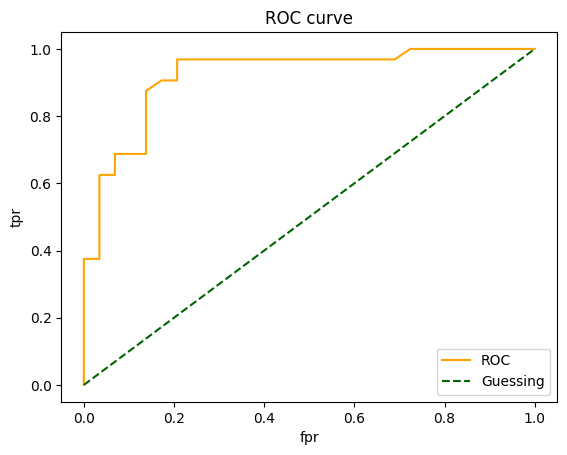

In [28]:
# Create a function for plotting ROC curves (SkLearn doesn.t offer plotting hence we need to define a function and import matplotlib library)
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    '''
    plot an ROC curve given fpr and tpr of a model
    
    '''
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1], [0,1], color="darkgreen", linestyle="--", label="Guessing")
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.title("ROC curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)    

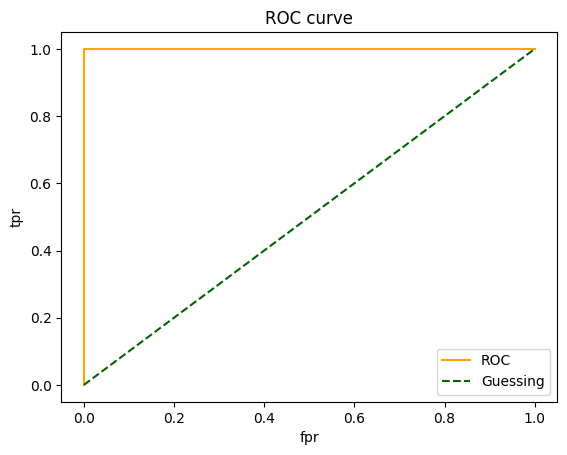

In [32]:
fpr, tpr, thresholds=roc_curve(Y_test, Y_test)
plot_roc_curve(fpr, tpr)

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_probs_positive)

0.9213362068965517

In [34]:
roc_auc_score(Y_test, Y_test)

1.0

 Rather than an ROC curve we can use an auc score

**Confusion Matrix**
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, let's take an idea of where the model get's confused



In [37]:
from sklearn.metrics import confusion_matrix
Y_preds=clf.predict(X_test)
confusion_matrix(Y_test, Y_preds)


array([[24,  5],
       [ 3, 29]], dtype=int64)

In [38]:
pd.crosstab(Y_test, Y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,3,29


In [39]:
24+5+3+29

61

In [40]:
len(Y_preds)

61

In [41]:
# Make our confusion matrix more visual using Seaborn's heatmap() (Plot rectangular data as a coloured encoded matrix)
# Seaborn is a visualization library that is built on the top of matplotlib
 

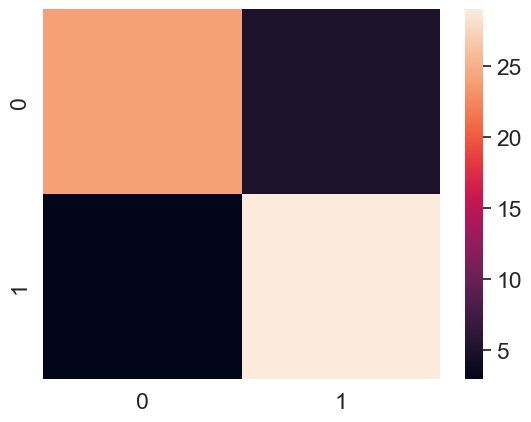

In [43]:
import seaborn as sns
sns.set (font_scale=1.5)
confusion_matrix=confusion_matrix(Y_test, Y_preds)
sns.heatmap(confusion_matrix); 

In [44]:
from sklearn.metrics import confusion_matrix
Y_preds=clf.predict(X_test)
confusion_matrix(Y_test, Y_preds)

array([[24,  5],
       [ 3, 29]], dtype=int64)

In [45]:
pd.crosstab(Y_test, Y_preds, rownames=["Actual Label"], colnames=["Predicted Label"])


Predicted Label,0,1
Actual Label,,
0,24,5
1,3,29


Creating a confusion matrix using Scikit Learn
To use the new methods of creating a confusion matrix with Scikit-Learn we will need a Scikit Learn version 1+


In [50]:
import sklearn
sklearn.__version__

'1.4.1.post1'

Confusion Matrix through 
* Estimator
* Predictions

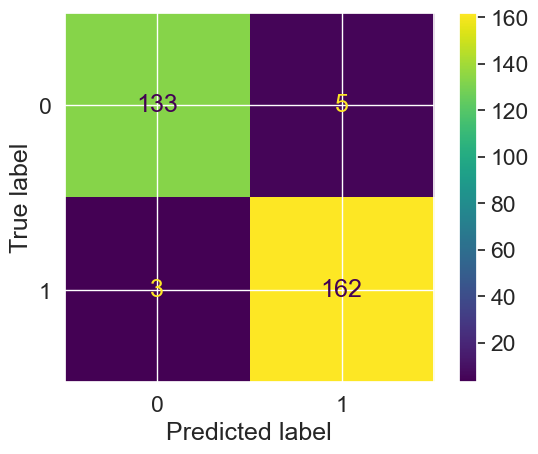

In [62]:
# M1.
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=Y);


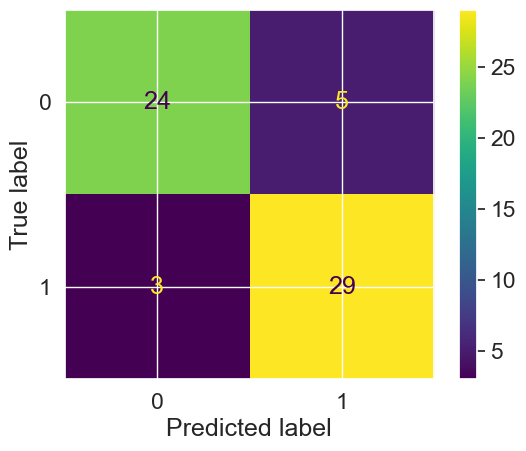

In [63]:
# M2.
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, Y_preds);

So far What we have convered in evaluating a classification model-
* Accuracy
* ROC curve
* AUC 
* Confusion Matrix
* Classification Report


Final
Classification model evaluation matrix- Classification Report (collection of different evaluation matrix)
*Number of different parameters evaluating a classsification model*


In [64]:
from sklearn.metrics import classification_report
classification_report(Y_test, Y_preds)

'              precision    recall  f1-score   support\n\n           0       0.89      0.83      0.86        29\n           1       0.85      0.91      0.88        32\n\n    accuracy                           0.87        61\n   macro avg       0.87      0.87      0.87        61\nweighted avg       0.87      0.87      0.87        61\n'

In [71]:
# Where precision and recall becomes valuable
disease_true=np.zeros(1000)
specific_indexes=[1,4,7]
disease_true[specific_indexes]=1 # only 1 positive case
disease_preds=np.zeros(1000) # model predicts every case as 0
pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

c:\Users\ftska\Documents\sample_project_2\python_venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ftska\Documents\sample_project_2\python_venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ftska\Documents\sample_project_2\python_venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.997000,0.0,0.997,0.498500,0.994009
recall,1.000000,0.0,0.997,0.500000,0.997000
f1-score,0.998498,0.0,0.997,0.499249,0.995502
support,997.000000,3.0,0.997,1000.000000,1000.000000
